# Arrays of numbers & Data Fitting
In this notebook we look at how to create / read in an array of numbers, fit the data to a polynomial or any arbitrary function.

## ndarray from numpy

In [76]:
import numpy as np

For any function you want to know more, place a question mark after the name and shift-enter to see a pop-up showing help about that function.

In [77]:
np.arange?

Change the argument to the function arange from float (3.0) to int (3) and see the output array and its datatype.

In [78]:
a = np.arange(3.0)
type(a)

numpy.ndarray

In [79]:
a.dtype

dtype('float64')

In [80]:
a

array([0., 1., 2.])

You can inspect the datatypes available in numpy.

In [81]:
np.finfo(np.float16)

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

In [82]:
np.finfo(np.float64)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [83]:
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

In [84]:
np.iinfo(np.int64)

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

You can instruct which datatype to be used to create the array.

In [85]:
a1 = np.arange(10, dtype='f')

In [86]:
a1

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

In [87]:
a2 = np.arange(10, dtype='i')

In [88]:
a2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

### Shape of array

In [89]:
a1.shape

(10,)

In [90]:
a2 = a1.reshape(5,2)

In [91]:
a2

array([[0., 1.],
       [2., 3.],
       [4., 5.],
       [6., 7.],
       [8., 9.]], dtype=float32)

In [92]:
a2.shape

(5, 2)

In [93]:
a3 = a2.ravel()
print(a3)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [94]:
a4 = a2.flatten()
print(a4)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [95]:
a2.transpose()

array([[0., 2., 4., 6., 8.],
       [1., 3., 5., 7., 9.]], dtype=float32)

### Reading array from a local file

Check the working directory of the notebook to ensure the filename is relative to the path.

In [96]:
%pwd

'/Users/Bhakna/Downloads'

Now, we generate the data file using the code below.

In [97]:
import random
my_data = np.zeros((7, 2))
for i in range(7):
    my_data[i, 0] = i + 1
    err = ((2*random.uniform(0, 1)) - 1)/2
    my_data[i, 1] = ((i+1)**2) + err
my_data

array([[ 1.        ,  0.99020235],
       [ 2.        ,  3.65252525],
       [ 3.        ,  9.45011154],
       [ 4.        , 16.17851312],
       [ 5.        , 24.6909253 ],
       [ 6.        , 35.70504593],
       [ 7.        , 49.09769318]])

In [98]:
np.savetxt("expdata.csv", my_data,  
              delimiter = ",")

We now use the file "expdata.csv" created above for plotting data.

In [99]:
d1 = np.genfromtxt('expdata.csv', delimiter=',', usecols=(0,1))

In [100]:
d1

array([[ 1.        ,  0.99020235],
       [ 2.        ,  3.65252525],
       [ 3.        ,  9.45011154],
       [ 4.        , 16.17851312],
       [ 5.        , 24.6909253 ],
       [ 6.        , 35.70504593],
       [ 7.        , 49.09769318]])

In [101]:
%matplotlib inline

In [102]:
import matplotlib.pyplot as plt

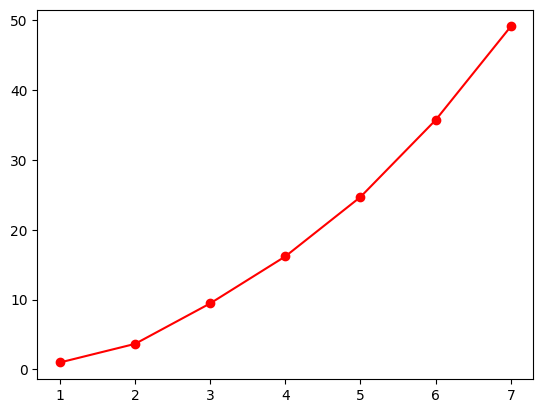

In [103]:
plt.plot(d1[:,0], d1[:,1], 'ro-')

### Fitting the data to a polynomial

In [104]:
poly = np.polyfit(d1[:,0], d1[:,1], 1)

In [105]:
poly

array([  7.98815456, -11.98618728])

In [106]:
np.polyval(poly, 3.0)

11.978276394221112

In [107]:
yf = np.polyval(poly, d1[:,0])

In [108]:
yf

array([-3.99803272,  3.99012184, 11.97827639, 19.96643095, 27.95458551,
       35.94274007, 43.93089462])

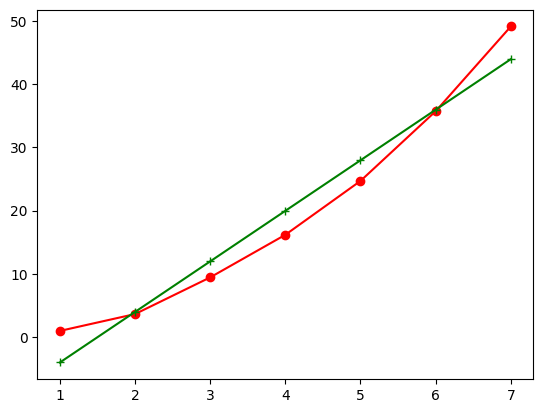

In [109]:
plt.plot(d1[:,0], d1[:,1], 'ro-')
plt.plot(d1[:,0], yf, 'g+-')

## Fitting data to any function using scipy

We create a data that is a bit noisy but otherwise sinusoidal in appearance. We then use the optimize sub-package under scipy to fit the user defined function to the data.

In [110]:
np.random.seed(0)

In [111]:
x_data = np.linspace(-5, 5, num=50)

In [112]:
import math as math

Here is a reminder that you cannot use functions in the math module to pass an array in. 

In [113]:
# y_data = math.sin(x_data) # uncomment to see the error

You can do that using the same functions in numpy module. 

In [114]:
y_data = 2.9*np.sin(1.5*x_data) + np.random.normal(size=50)

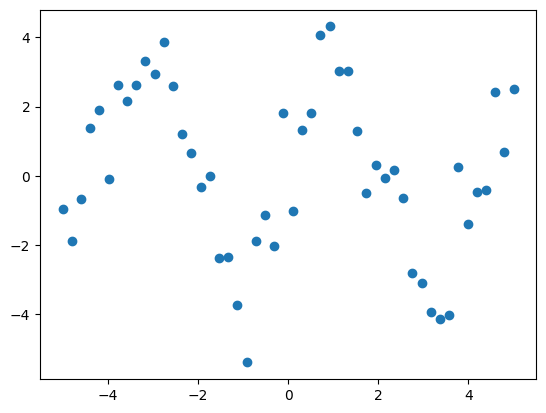

In [115]:
plt.scatter(x_data, y_data)
plt.show()

In [116]:
from scipy import optimize

In [117]:
def test_func(x,a,b):
    return a*np.sin(b*x)

In [118]:
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])

In [119]:
print(params)

[3.05931973 1.45754553]


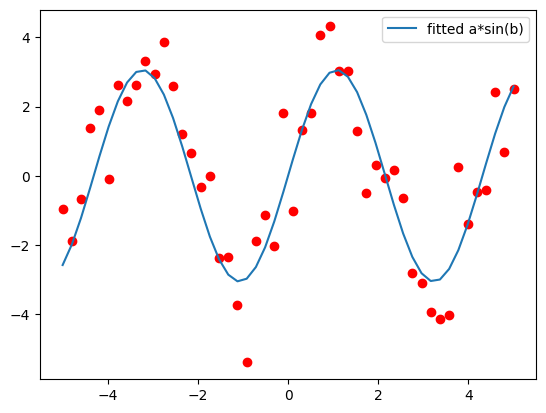

In [120]:
plt.scatter(x_data, y_data, c='r')
plt.plot(x_data,test_func(x_data,params[0], params[1]), label='fitted a*sin(b)')
plt.legend(loc='best')
plt.show()